In [159]:
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random as rnd
import datetime 

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree #Look at documentation: http://scikit-learn.org/stable/modules/tree.html
from sklearn import model_selection
#import pyplot 


from sklearn.model_selection import train_test_split # Helping you divide your datasets to train/test(validation)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

# Load the CSV

In [160]:
churn_df = pd.read_csv('customer_churn.csv')

# Explore Data at a Summary Level

#### 3333 Records, 23 Features

In [161]:

churn_df.shape

(3333, 21)

In [162]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [163]:
churn_df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


# Rename the columns

In [164]:
churn_df.columns = ['State', 'AccountLength', 'AreaCode', 'Phone', 'IntlPlan',
       'VMailPlan', 'VMailMessage', 'DayMins', 'DayCalls', 'DayCharge',
       'EveMins', 'EveCalls', 'EveCharge', 'NightMins', 'NightCalls',
       'NightCharge', 'IntlMins', 'IntlCalls', 'IntlCharge',
       'CustServCalls', 'Churn']
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


Which features are categorical?
- State, Area Code, Phone, Int'l Plan, Churn?

Which features are continuous?
- Account length, Vmail Message, Day Mins, Day Calls, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Calls, Intl Charge, CustServCalls

Which features are mixed data types?
- None

Which features contain blank, null or empty values?
- None

# Convert categorical variables to numerical: 'Churn?', 'IntlPlan', 'VMailPlan'

In [165]:
churn = churn_df['Churn'].map({'False.':0, 'True.':1})
churn_df['churn'] = churn
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,False.,0


# Determine the Total Customer Churn

In [166]:
total_churn = churn_df['churn'].sum()
percent_churn = total_churn / 3333
print("# of Customers Churned:", total_churn)
print("% of Customers Churned:", percent_churn*100)

# of Customers Churned: 483
% of Customers Churned: 14.491449144914492


In [167]:
churn_df['IntlPlan'].map({0:"yes", 1:'no'})
churn_df['VMailPlan'].map({0:"yes", 1:'no'})
churn_df['Churn'] = churn
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0


In [168]:
churn_df.head(1)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0


# Create 'StateCategory' as an Index to 'State' so that we can graph Churn by State

In [169]:
churn_df['StateCategory'] = churn_df['State'].factorize()[0]
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,0,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.7,1,0,0,1


### Doesn't appear to be a correlation between state and # of people who churned

In [170]:
state_df= churn_df[['State','churn']].groupby(['State'], as_index=False).sum()
state_df.sort_values(by=['churn'], ascending=False)

,State,churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


Text(0,0.5,'# of Churn Customers')

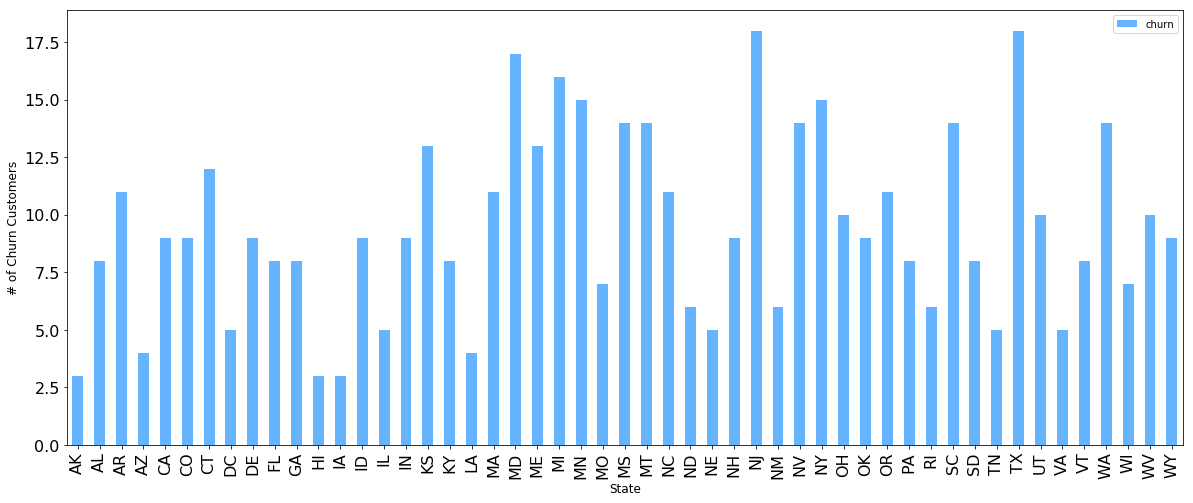

In [171]:
state_df.plot.bar(x='State',y = 'churn',figsize= (20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('State', fontsize=12)
plt.ylabel('# of Churn Customers', fontsize=12)

# Customer Service Analysis

### Count of Customer Service Calls and Churn Customers

Text(0,0.5,'# of Churn Customers')

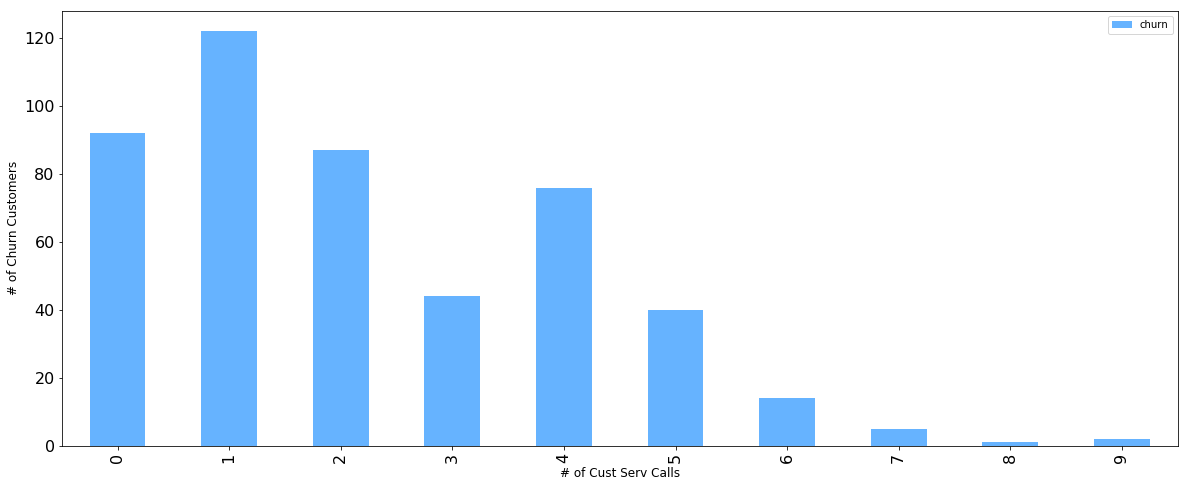

In [172]:
custserv_df= churn_df[['CustServCalls','churn']].groupby(['CustServCalls'], as_index=False).sum()
custserv_df.plot.bar(x = 'CustServCalls', y ='churn',figsize=(20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('# of Cust Serv Calls', fontsize=12)
plt.ylabel('# of Churn Customers', fontsize=12)

In [173]:
custserv_df.sort_values(by=['churn'], ascending=False)

,CustServCalls,churn
1,1,122
0,0,92
2,2,87
4,4,76
3,3,44
5,5,40
6,6,14
7,7,5
9,9,2
8,8,1


### Add a column 'Churn_pct' which calculates the % of churned customers 

Text(0,0.5,'% of Churn Customers')

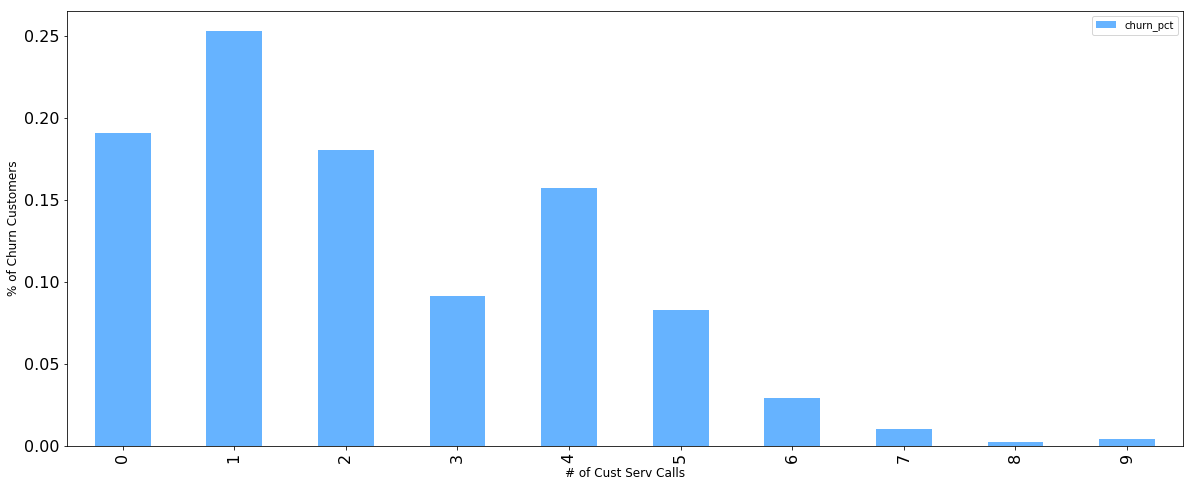

In [174]:
custserv_df['churn_pct'] = custserv_df['churn'] / total_churn
custserv_df.plot.bar(x = 'CustServCalls', y ='churn_pct',figsize=(20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('# of Cust Serv Calls', fontsize=12)
plt.ylabel('% of Churn Customers', fontsize=12)

### 19% of churn customers do not log a support call
### 25% of churn customer log 1 support call
### 18% of churn customer log 2 support calls
### 81% of churn customers log a support call

# Voicemail Plans Analysis

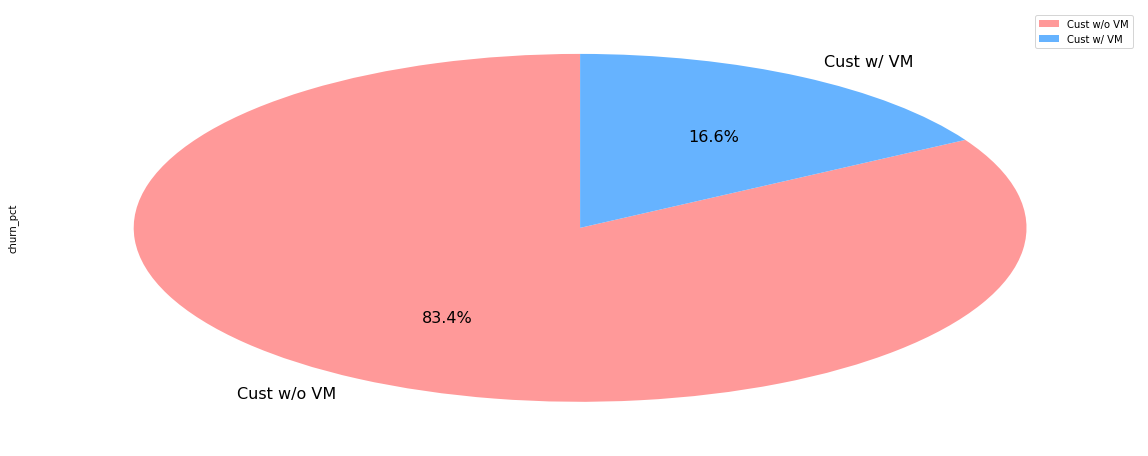

In [175]:
voicemail_df= churn_df[['VMailPlan','churn']].groupby(['VMailPlan'], as_index=False).sum()
voicemail_df['churn_pct'] = voicemail_df['churn'] / total_churn
ax = voicemail_df.plot.pie(x = 'VMailPlan', y ='churn_pct',figsize=(20,8), fontsize = 16, colors = ['#ff9999','#66b3ff'], labels=['Cust w/o VM', 'Cust w/ VM'],autopct='%1.1f%%', startangle=90)

In [176]:
voicemail_df.head(2)

,VMailPlan,churn,churn_pct
0,no,403,0.834369
1,yes,80,0.165631


# International Plan counts

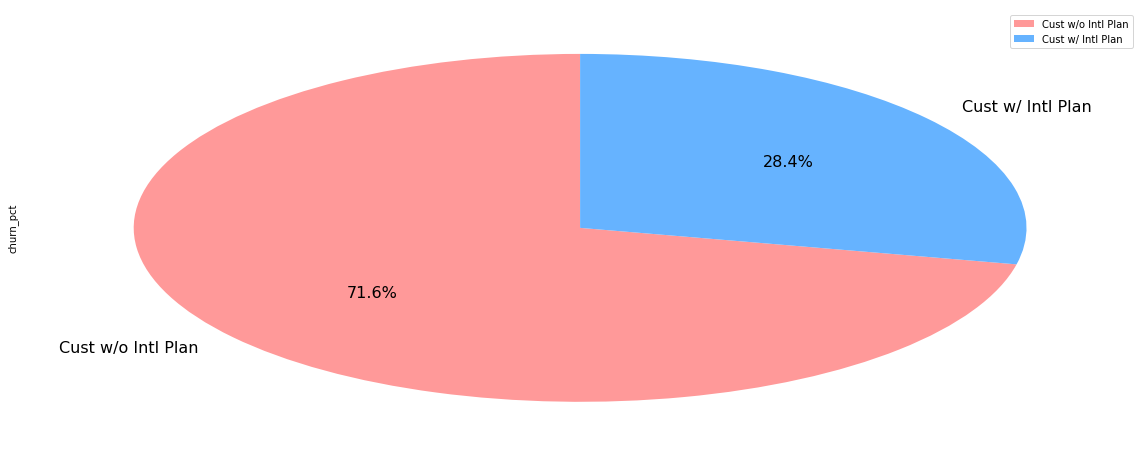

In [177]:
IntlPlan_df= churn_df[['IntlPlan','churn']].groupby(['IntlPlan'], as_index=False).sum()
IntlPlan_df['churn_pct'] = IntlPlan_df['churn'] / total_churn
IntlPlan_df.plot.pie(x = 'IntlPlan', y ='churn_pct',figsize=(20,8), fontsize = 16, colors = ['#ff9999','#66b3ff'], labels=['Cust w/o Intl Plan', 'Cust w/ Intl Plan'],autopct='%1.1f%%', startangle=90)

Next step is to investigate minutes usage. Daytime charges have the highest max and median charges

# Day Charge counts

### Sort DayCharges by Churn customer count

In [178]:
daycharge_df = churn_df[['DayCharge','churn']].groupby(['DayCharge'], as_index=False).sum()
daycharge_df.sort_values(by=['churn'], ascending=False).head()

,DayCharge,churn
1594,48.81,2
714,28.41,2
1352,41.17,2
1642,53.04,2
1458,44.10,2


### Sort Day Charges by the # of Customers churned

In [179]:
zero_churn = daycharge_df.loc[daycharge_df['churn'] == 0]
zero_df = zero_churn[zero_churn.columns.drop('churn')]
zero_df.columns = ['No Churn']
zero_df.head(2)

,No Churn
1,0.44
2,1.33


In [180]:
one_churn = daycharge_df.loc[daycharge_df['churn'] == 1]
one_df = one_churn[one_churn.columns.drop('churn')]
one_df.columns = ['1 Churned Cust']
one_df.head(2)

,1 Churned Cust
0,0.00
22,7.91


In [181]:
two_churn = daycharge_df.loc[daycharge_df['churn'] == 2]
two_df = two_churn[two_churn.columns.drop('churn')]
two_df.columns = ['2 Churned Cust']
two_df.head(2)

,2 Churned Cust
405,22.37
418,22.66


Text(0,0.5,'Daytime Charges')

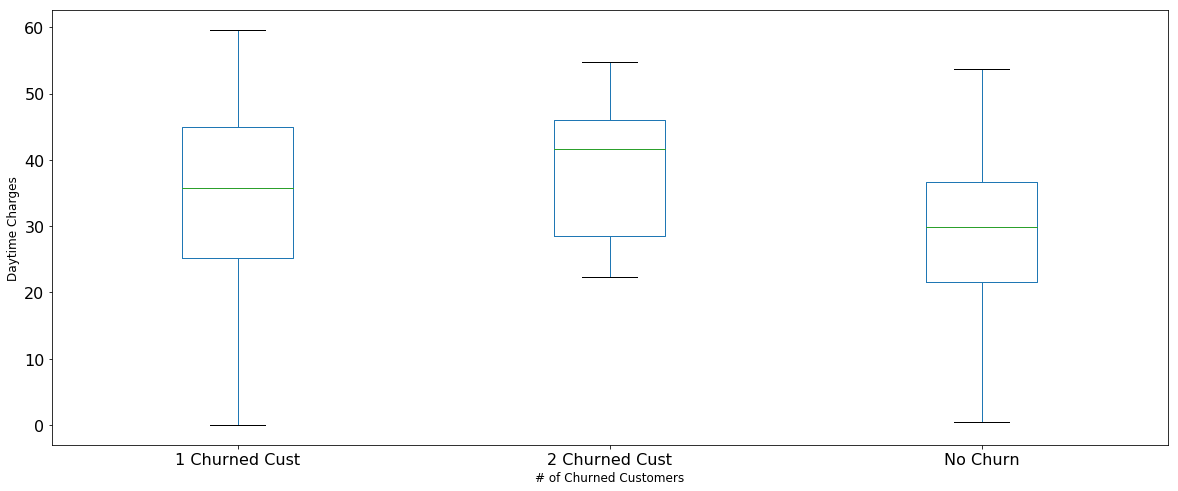

In [182]:
churn_concat = pd.concat([one_df, two_df, zero_df])
churn_concat.head()
churn_concat.plot(kind='box', figsize = (20,8), fontsize = 16)
plt.xlabel('# of Churned Customers', fontsize=12)
plt.ylabel('Daytime Charges', fontsize=12)

### Churned customers have higher Day Charges than No Churn customers

# Classification

We will now select the columns for traning our Churn classifier

In [183]:
churn_df.columns

Index(['State', 'AccountLength', 'AreaCode', 'Phone', 'IntlPlan', 'VMailPlan',
       'VMailMessage', 'DayMins', 'DayCalls', 'DayCharge', 'EveMins',
       'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge',
       'IntlMins', 'IntlCalls', 'IntlCharge', 'CustServCalls', 'Churn',
       'churn', 'StateCategory'],
      dtype='object')

# Select Columns to Use and Drop Columns that Won't be Used in Modelling

In [184]:
churn_df_class = churn_df[['CustServCalls','IntlPlan','DayCharge','DayMins',
                          'DayCalls','IntlMins','IntlCalls','IntlCharge','VMailPlan',
                         'VMailMessage','StateCategory','AccountLength',
                          'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge',
                          'churn']]

churn_df_class  = churn_df.drop(["Phone", "AreaCode", "State","StateCategory","Churn"], axis=1)


# Before we begin our classification we will have to convert the categorical variables VMailPlan and IntlPlan to numerical

In [185]:
churn_df_class.IntlPlan.replace(['yes', 'no'], [0,1], inplace=True)
churn_df_class.VMailPlan.replace(['yes', 'no'], [0,1], inplace=True)


In [186]:
churn_df_class.head(2)

,AccountLength,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,churn
0,128,1,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,107,1,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


### Initializing classifiers and divide the to train/test(validation)

We use 5 different classifiers to predict whether the customer will churn or not. After evaluating the performance of the 5 we will choose the one that has the higest accuracy and then train our dataset on that classifier.

In [187]:
#Initialize Various Classifiers
clf = GaussianNB()
clf_tree = tree.DecisionTreeClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVM = svm.SVC()
clf_randomforest = RandomForestClassifier()

# Split-out validation dataset
array = churn_df_class.values
X = array[:,0:17] # Features/Independent Variables
Y = array[:,17] # Response/Class Variable

#Scaling the features to have the same magnitude 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use 10% of data as the test set
validation_size = 0.10

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

334
2999


## Performance Evaluation and Model Selection Using Cross Validation

In [188]:
# Test options and evaluation metric
scoring = 'accuracy'

#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results_nb = model_selection.cross_val_score(GaussianNB(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_tree = model_selection.cross_val_score(tree.DecisionTreeClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_svm = model_selection.cross_val_score(svm.SVC(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_random = model_selection.cross_val_score(RandomForestClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results_nb.mean(), cv_results_nb.std())
msg2 = "%s: %f (%f)" % ('Tree accuracy', cv_results_tree.mean(), cv_results_tree.std())
msg3 = "%s: %f (%f)" % ('KNN accuracy', cv_results_knn.mean(), cv_results_knn.std())
msg4 = "%s: %f (%f)" % ('SVM accuracy', cv_results_svm.mean(), cv_results_svm.std())
msg5 = "%s: %f (%f)" % ('Random Forest accuracy', cv_results_random.mean(), cv_results_random.std())

print(msg)
print(msg2)
print(msg3)
print(msg4)
print(msg5)


NB accuracy: 0.862292 (0.018289)
Tree accuracy: 0.912308 (0.012806)
KNN accuracy: 0.895304 (0.016447)
SVM accuracy: 0.921309 (0.017644)
Random Forest accuracy: 0.945320 (0.013168)


### We found that by using a 10% validation size we got better results with our classifiers.

### Setting up classifier parameters, evaluation metric, and train and test (validate) using the classifier that gives us the highest accuracy. In our case Random Forest was a clear winner.

In [189]:
#Fitting the training set on RandomForest
clf_randomforest.fit(X_train,Y_train)

#Predicting for the Test(Validation) Set
pred_randomforest = clf_randomforest.predict(X_validation)
probs = clf_randomforest.predict_proba(X_validation)

# The classification report gives us an understanding of how well the classifier performed

In [190]:
report = classification_report(Y_validation,pred_randomforest)
print(report)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97       283
        1.0       0.93      0.75      0.83        51

avg / total       0.95      0.95      0.95       334



# Here we caculate the confusionmatrix as well as the ROC curve. Confusion matrix gives us a breakdown of the true positives and false postives. ROC curve gives us a visual presentation of the same. The closer the curve is towards the top left corner the better our predictions. Concretely the more area under the curve the better.

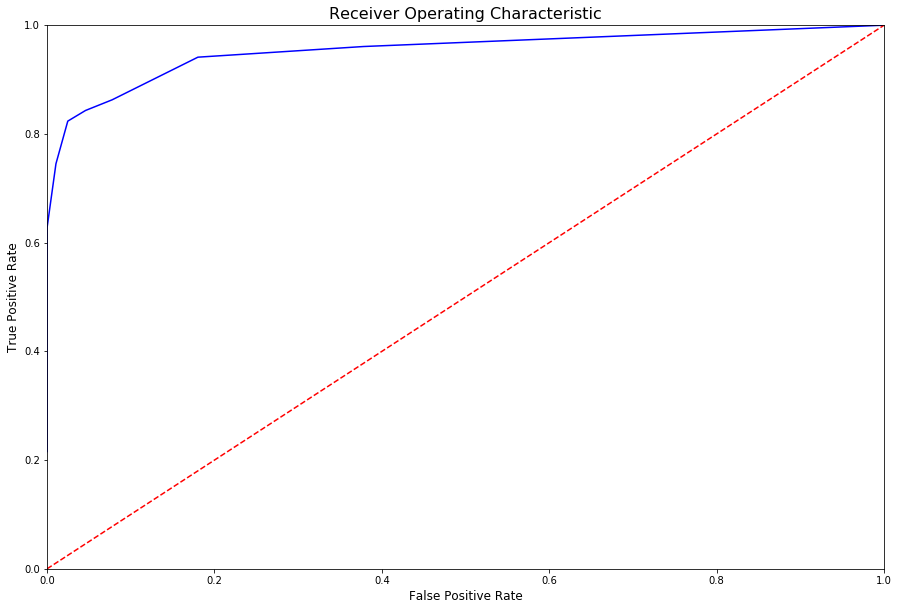

,Predicted False,Predicted True
Actual False,280,3
Actual True,13,38


In [191]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(Y_validation, probs[:,1])
plt.figure(figsize=(15,10))
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
     confusion_matrix(Y_validation, pred_randomforest), 
     columns=["Predicted False", "Predicted True"], 
     index=["Actual False", "Actual True"]
    )
display(confusion_matrix)